In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
df.describe()

categorical_cols = df.select_dtypes(include="object").columns.tolist()
print("Kategorik sütunlar:", categorical_cols)

Kategorik sütunlar: ['sex', 'embarked', 'who', 'embark_town', 'alive']


In [5]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

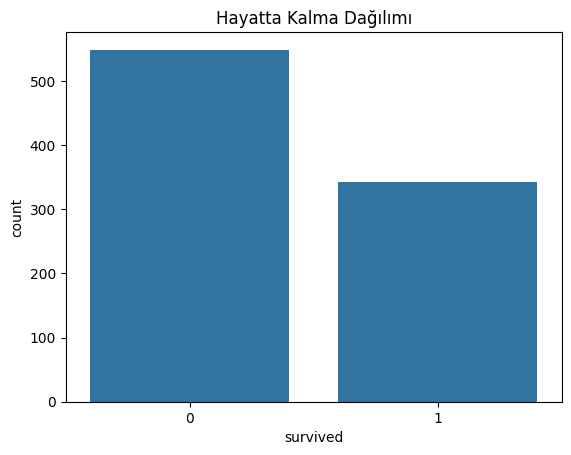

Hayatta kalma oranları:
 survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


In [6]:
sns.countplot(data=df, x="survived")
plt.title("Hayatta Kalma Dağılımı")
plt.show()

survival_rate = df["survived"].value_counts(normalize=True)
print("Hayatta kalma oranları:\n", survival_rate)

In [7]:
missing = df.isnull().mean() * 100
print(missing[missing > 0].sort_values(ascending=False))

deck           77.216611
age            19.865320
embarked        0.224467
embark_town     0.224467
dtype: float64


In [8]:
df.drop(columns=["deck"], inplace=True)

In [9]:
df["age"].fillna(df["age"].median(), inplace=True)
df["embarked"].fillna(df["embarked"].mode()[0], inplace=True)
df.drop(columns=["embark_town"], inplace=True)

/var/folders/06/w39fm9yn2m3c0cn8q4xvpjzw0000gn/T/ipykernel_3127/311785145.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].fillna(df["age"].median(), inplace=True)
/var/folders/06/w39fm9yn2m3c0cn8q4xvpjzw0000gn/T/ipykernel_3127/311785145.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

In [10]:
df["age"] = df["age"].fillna(df["age"].median())
df["embarked"] = df["embarked"].fillna(df["embarked"].mode()[0])
df.drop(columns=["embark_town"], inplace=True)

KeyError: "['embark_town'] not found in axis"

In [11]:
df["age"] = df["age"].fillna(df["age"].median())
df["embarked"] = df["embarked"].fillna(df["embarked"].mode()[0])

if "embark_town" in df.columns:
    df.drop(columns=["embark_town"], inplace=True)


In [12]:
df.select_dtypes(include="object").columns

Index(['sex', 'embarked', 'who', 'alive'], dtype='object')

In [13]:
df.select_dtypes(include="bool").columns

Index(['adult_male', 'alone'], dtype='object')

In [14]:
df_encoded = pd.get_dummies(df, 
                            columns=["sex", "embarked", "class", "who", "adult_male", "alone"], 
                            drop_first=True)

In [15]:
df_encoded.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   survived         891 non-null    int64  
 1   pclass           891 non-null    int64  
 2   age              891 non-null    float64
 3   sibsp            891 non-null    int64  
 4   parch            891 non-null    int64  
 5   fare             891 non-null    float64
 6   alive            891 non-null    object 
 7   sex_male         891 non-null    bool   
 8   embarked_Q       891 non-null    bool   
 9   embarked_S       891 non-null    bool   
 10  class_Second     891 non-null    bool   
 11  class_Third      891 non-null    bool   
 12  who_man          891 non-null    bool   
 13  who_woman        891 non-null    bool   
 14  adult_male_True  891 non-null    bool   
 15  alone_True       891 non-null    bool   
dtypes: bool(9), float64(2), int64(4), object(1)
memory usage: 56.7

In [16]:
df_encoded.drop(columns=["alive"], inplace=True)
df.encoded.info()

AttributeError: 'DataFrame' object has no attribute 'encoded'

In [18]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   survived         891 non-null    int64  
 1   pclass           891 non-null    int64  
 2   age              891 non-null    float64
 3   sibsp            891 non-null    int64  
 4   parch            891 non-null    int64  
 5   fare             891 non-null    float64
 6   sex_male         891 non-null    bool   
 7   embarked_Q       891 non-null    bool   
 8   embarked_S       891 non-null    bool   
 9   class_Second     891 non-null    bool   
 10  class_Third      891 non-null    bool   
 11  who_man          891 non-null    bool   
 12  who_woman        891 non-null    bool   
 13  adult_male_True  891 non-null    bool   
 14  alone_True       891 non-null    bool   
dtypes: bool(9), float64(2), int64(4)
memory usage: 49.7 KB


In [19]:
from sklearn.model_selection import train_test_split
y = df_encoded["survived"]
X = df_encoded.drop("survived", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")

Train set: (712, 14), Test set: (179, 14)


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)
y_prob_log = log_model.predict_proba(X_test)[:, 1] 

In [21]:
print("🔹 Logistic Regression Sonuçları")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))

🔹 Logistic Regression Sonuçları
Accuracy: 0.8100558659217877
ROC-AUC: 0.8774774774774774
Confusion Matrix:
 [[91 14]
 [20 54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [22]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]


In [23]:
print("🔸 Random Forest Sonuçları")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


🔸 Random Forest Sonuçları
Accuracy: 0.8212290502793296
ROC-AUC: 0.8931788931788932
Confusion Matrix:
 [[90 15]
 [17 57]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       105
           1       0.79      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



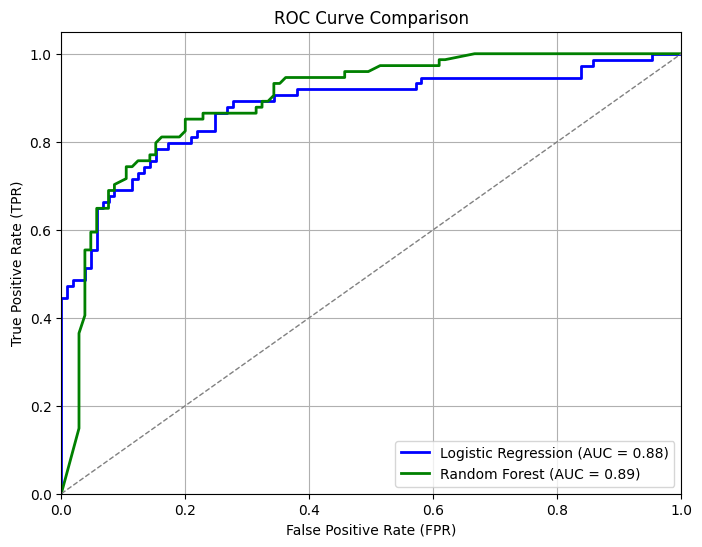

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Logistic Regression için ROC eğrisi
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
roc_auc_log = auc(fpr_log, tpr_log)

# Random Forest için ROC eğrisi
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8,6))
plt.plot(fpr_log, tpr_log, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_log:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

plt.plot([0,1], [0,1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

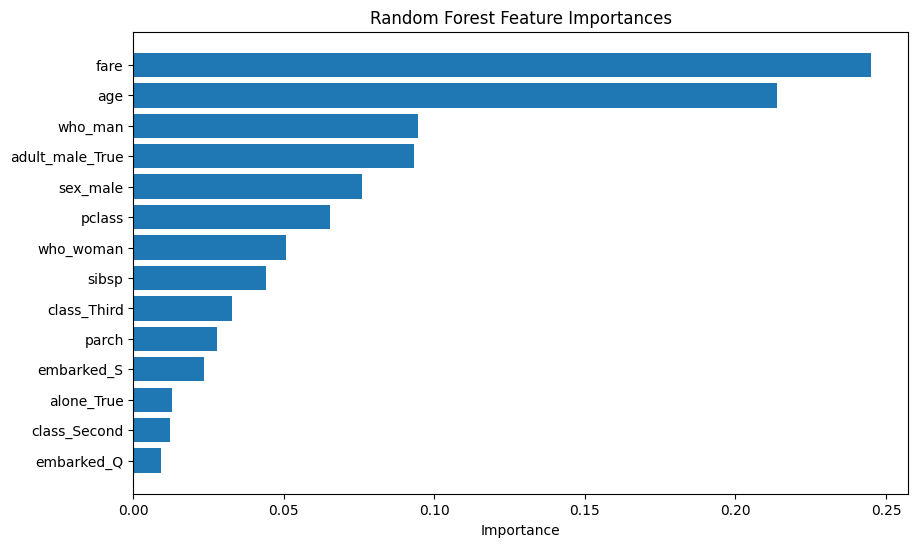

In [25]:
import pandas as pd
import numpy as np

importances = rf_model.feature_importances_
features = X.columns

feat_imp_df = pd.DataFrame({'feature': features, 'importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(feat_imp_df['feature'], feat_imp_df['importance'])
plt.gca().invert_yaxis()
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance')
plt.show()

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Pipeline oluşturalım
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000))
])

param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10, 100],
    'logreg__solver': ['liblinear', 'lbfgs']
}

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='roc_auc')
grid.fit(X_train, y_train)

print("En iyi parametreler:", grid.best_params_)
print("En iyi CV ROC-AUC:", grid.best_score_)

En iyi parametreler: {'logreg__C': 0.1, 'logreg__solver': 'lbfgs'}
En iyi CV ROC-AUC: 0.8568282285793416


In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)

grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='roc_auc', n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("En iyi Random Forest parametreleri:", grid_rf.best_params_)
print("En iyi CV ROC-AUC skoru:", grid_rf.best_score_)


En iyi Random Forest parametreleri: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
En iyi CV ROC-AUC skoru: 0.8657904838077618


In [29]:
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report

# Logistic Regression best
best_log = grid.best_estimator_
y_pred_log = best_log.predict(X_test)
y_prob_log = best_log.predict_proba(X_test)[:, 1]

print("Logistic Regression Test ROC-AUC:", roc_auc_score(y_test, y_prob_log))
print("Logistic Regression Test Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))

# Random Forest best
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]

print("\nRandom Forest Test ROC-AUC:", roc_auc_score(y_test, y_prob_rf))
print("Random Forest Test Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Logistic Regression Test ROC-AUC: 0.8794079794079794
Logistic Regression Test Accuracy: 0.8156424581005587
Confusion Matrix:
 [[92 13]
 [20 54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179


Random Forest Test ROC-AUC: 0.9046975546975546
Random Forest Test Accuracy: 0.8379888268156425
Confusion Matrix:
 [[96  9]
 [20 54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87       105
           1       0.86      0.73      0.79        74

    accuracy                           0.84       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179



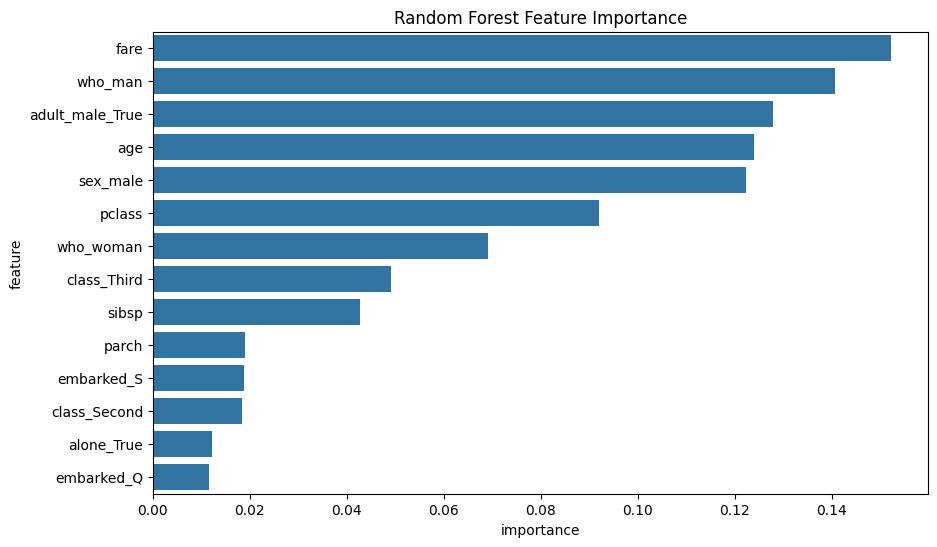

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

best_rf = grid_rf.best_estimator_

features = X_train.columns

importances = best_rf.feature_importances_

feat_imp = pd.DataFrame({'feature': features, 'importance': importances})
feat_imp = feat_imp.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=feat_imp)
plt.title('Random Forest Feature Importance')
plt.show()

# Titanic Projesi – Model Karşılaştırma ve Raporlama

## 1. Kullanılan Modeller
- **Logistic Regression**: Basit, yorumlanabilir, lineer sınıflandırıcı.
- **Random Forest**: Karar ağaçlarının bir araya gelmesiyle oluşturulan güçlü bir topluluk modeli.

---

## 2. Hiperparametreler

### Logistic Regression
- `C = 0.1`
- `solver = 'lbfgs'`
- `max_iter = 1000`

### Random Forest (GridSearch sonrası)
- `n_estimators = grid_rf.best_params_` 
- `max_depth = ...`
- `min_samples_split = ...`
- `min_samples_leaf = ...`

---

## 3. Test Performans Karşılaştırması


In [33]:
import pandas as pd

data = {
    "Metric": ["ROC-AUC", "Accuracy", "Precision (1)", "Recall (1)", "F1-Score (1)"],
    "Logistic Regression": [0.879, 0.816, 0.81, 0.73, 0.77],
    "Random Forest": [0.905, 0.838, 0.86, 0.73, 0.79]
}

results_df = pd.DataFrame(data)
results_df


,Metric,Logistic Regression,Random Forest
0,ROC-AUC,0.879,0.905
1,Accuracy,0.816,0.838
2,Precision (1),0.810,0.860
3,Recall (1),0.730,0.730
4,F1-Score (1),0.770,0.790


## 4. Yorumlar

- Random Forest modeli, tüm metriklerde Logistic Regression'dan daha iyi sonuçlar verdi.
- ROC-AUC skorunun yüksek olması, modelin sınıflar arası ayrımı daha iyi yaptığını gösteriyor.
- Her iki modelde de Recall (1) değeri aynı, ancak RF modelinin Precision ve F1-score'u daha yüksek.
- Logistic Regression daha sade ve anlaşılır bir model; yorumlanabilirlik öncelikse tercih edilebilir.
- Random Forest, veri setindeki karmaşık ilişkileri daha iyi öğrenebiliyor.

---

## 5. Sonuç ve Öneriler

- Bu projede en başarılı model: **Random Forest**.
- Modelin başarısını artırmak için:
  - Yeni modeller denenebilir (XGBoost, LightGBM).
  - Feature engineering yapılabilir.
  - Daha fazla cross-validation ve tuning uygulanabilir.


In [35]:
print("Logistic Regression En İyi Parametreler:", grid.best_params_)
print("Random Forest En İyi Parametreler:", grid_rf.best_params_)

Logistic Regression En İyi Parametreler: {'logreg__C': 0.1, 'logreg__solver': 'lbfgs'}
Random Forest En İyi Parametreler: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
